# Anexo 4

In [1]:
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor
from ASHRAE_tools import meter_dict
from ASHRAE_tools import submit
import ASHRAE_data_prep

meter_dict = meter_dict()

In [2]:
X_train, y_train = ASHRAE_data_prep.train_reg()

In [3]:
mod_boost = GradientBoostingRegressor()

In [5]:
mod_boost.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
X_test = test_tree()

In [10]:
y_pred = mod_boost.predict(X_test)

In [15]:
max(y_pred)

6608313.231019208

In [16]:
X_test.head()

,building_id,meter,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,wday,week
row_id,,,,,,,,,,,,
0,0,0,0,7432,17.8,11.7,1021.4,100.0,3.6,0,6,52
129,0,0,0,7432,17.8,12.8,1022.0,130.0,3.1,1,6,52
258,0,0,0,7432,16.1,12.8,1021.9,140.0,3.1,2,6,52
387,0,0,0,7432,17.2,13.3,1022.2,140.0,3.1,3,6,52
516,0,0,0,7432,16.7,13.3,1022.3,130.0,2.6,4,6,52


In [17]:
sub = pd.DataFrame(np.maximum(0,y_pred), index = X_test.index, columns = ['meter_reading'])

In [19]:
sub.sort_values(by = 'row_id', inplace = True)

In [21]:
sub.to_csv('./submission.csv')

### Validation train data

In [22]:
y_train_pred = mod_boost.predict(X_train)

In [24]:
y_train_pred = np.maximum(0,y_train_pred)

In [25]:
np.sqrt(mean_squared_log_error(y_train,y_train_pred))

3.258074702389428

In [26]:
mod_boost.feature_importances_

array([2.56883208e-05, 2.06567455e-01, 0.00000000e+00, 5.29796319e-01,
       5.31601040e-05, 2.17641505e-05, 4.32484055e-07, 0.00000000e+00,
       2.15710531e-06, 0.00000000e+00, 4.45474212e-07, 2.63532578e-01])

In [28]:
X_train.head()

,building_id,meter,site_id,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,wday,week
0,0,0,0,7432,25.0,20.0,1019.7,0.0,0.0,0,4,53
1,0,0,0,7432,24.4,21.1,1020.2,70.0,1.5,1,4,53
2,0,0,0,7432,22.8,21.1,1020.2,0.0,0.0,2,4,53
3,0,0,0,7432,21.1,20.6,1020.1,0.0,0.0,3,4,53
4,0,0,0,7432,20.0,20.0,1020.0,250.0,2.6,4,4,53


## Boost selected features

In [9]:
X_train, y_train = ASHRAE_data_prep.train_boost()

In [3]:
mod_boost2 = GradientBoostingRegressor(max_depth=4,learning_rate=0.2)

In [10]:
mod_boost2.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
X_train.head()

,building_id,meter,site_id,square_feet,air_temperature,sea_level_pressure,wind_speed,hour,wday,week
0,0,0,0,7432,25.0,1019.7,0.0,0,4,53
1,0,0,0,7432,24.4,1020.2,1.5,1,4,53
2,0,0,0,7432,22.8,1020.2,0.0,2,4,53
3,0,0,0,7432,21.1,1020.1,0.0,3,4,53
4,0,0,0,7432,20.0,1020.0,2.6,4,4,53


In [14]:
X_test = ASHRAE_data_prep.test_boost()

In [15]:
y_pred = mod_boost2.predict(X_test)

In [19]:
y_train_pred = mod_boost2.predict(X_train)

In [21]:
y_train_pred = np.maximum(0,y_train_pred)

In [22]:
np.sqrt(mean_squared_log_error(y_train,y_train_pred))

2.6361061548426963

In [23]:
mod_boost2.feature_importances_

array([4.41997187e-05, 3.50251965e-01, 8.82408208e-07, 2.16386645e-01,
       1.37740651e-02, 1.22966346e-03, 2.47340995e-07, 5.68901079e-07,
       6.79165597e-04, 4.17632598e-01])

In [24]:
sub = pd.DataFrame(np.maximum(0,y_pred), index = X_test.index, columns = ['meter_reading'])

In [25]:
sub.sort_values(by = 'row_id', inplace = True)

In [27]:
sub.to_csv('./submission.csv')

## Boost selected features 2

In [2]:
X_train, y_train = ASHRAE_data_prep.train_boost2()

In [3]:
mod_boost3 = GradientBoostingRegressor(max_depth=5,learning_rate=0.2)

In [4]:
mod_boost3.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
X_train.head()

,building_id,meter,square_feet,air_temperature,sea_level_pressure,hour,wday,week
0,0,0,7432,25.0,1019.7,0,4,53
1,0,0,7432,24.4,1020.2,1,4,53
2,0,0,7432,22.8,1020.2,2,4,53
3,0,0,7432,21.1,1020.1,3,4,53
4,0,0,7432,20.0,1020.0,4,4,53


In [6]:
X_test = ASHRAE_data_prep.test_boost2()

In [7]:
mod_boost3.feature_importances_

array([7.24586708e-05, 3.28734636e-01, 1.58445091e-01, 8.19193673e-02,
       1.16933446e-02, 2.86779717e-04, 5.29946393e-03, 4.13548859e-01])

In [8]:
y_pred = mod_boost3.predict(X_test)

In [9]:
min(y_pred)

-3309820.32228718

In [11]:
y_train_pred = mod_boost3.predict(X_train)

In [12]:
y_train_pred = np.maximum(0,y_train_pred)

In [13]:
np.sqrt(mean_squared_log_error(y_train,y_train_pred))

2.2811972263816065

In [14]:
sub = pd.DataFrame(np.maximum(0,y_pred), index = X_test.index, columns = ['meter_reading'])

In [15]:
sub.sort_values(by = 'row_id', inplace = True)

In [16]:
sub.to_csv('./submission.csv')

## Boost selected features 3

In [2]:
X_train, y_train = ASHRAE_data_prep.train_boost3()

In [3]:
mod_boost3 = GradientBoostingRegressor(max_depth=6,learning_rate=0.2)

In [6]:
mod_boost3.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
X_test = ASHRAE_data_prep.test_boost3()

In [8]:
y_pred = mod_boost3.predict(X_test)

In [9]:
sub = pd.DataFrame(np.maximum(0,y_pred), index = X_test.index, columns = ['meter_reading'])

In [10]:
sub.sort_values(by = 'row_id', inplace = True)

In [11]:
sub.to_csv('./submission.csv')

In [12]:
X_train.head()

,building_id,meter,square_feet,air_temperature,hour,wday,week
0,0,0,7432,25.0,0,4,53
1,0,0,7432,24.4,1,4,53
2,0,0,7432,22.8,2,4,53
3,0,0,7432,21.1,3,4,53
4,0,0,7432,20.0,4,4,53


In [13]:
mod_boost3.feature_importances_

array([0.00050284, 0.32908542, 0.14680447, 0.06787445, 0.00175311,
       0.01709582, 0.43688389])

### Validacion

In [14]:
y_train_pred = mod_boost3.predict(X_train)

In [15]:
y_train_pred = np.maximum(0,y_train_pred)

In [16]:
np.sqrt(mean_squared_log_error(y_train,y_train_pred))

2.0182951169745023

## Boosted selected features 4

In [2]:
X_train, y_train = ASHRAE_data_prep.train_boost4()

In [3]:
mod_boost4 = GradientBoostingRegressor(max_depth=7)

In [4]:
mod_boost4.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
X_train.head()

,meter,square_feet,air_temperature,hour,wday,week
0,0,7432,25.0,0,4,53
1,0,7432,24.4,1,4,53
2,0,7432,22.8,2,4,53
3,0,7432,21.1,3,4,53
4,0,7432,20.0,4,4,53


In [7]:
mod_boost4.feature_importances_

array([0.31340788, 0.14238878, 0.05924097, 0.00398445, 0.02750387,
       0.45347406])

In [11]:
y_train_pred = mod_boost4.predict(X_train)

In [12]:
y_train_pred = np.maximum(0,y_train_pred)

In [13]:
np.sqrt(mean_squared_log_error(y_train,y_train_pred))

1.9769082076318938

In [14]:
X_test = ASHRAE_data_prep.test_boost4()

In [15]:
y_pred = mod_boost4.predict(X_test)

In [17]:
sub = pd.DataFrame(np.maximum(0,y_pred), index = X_test.index, columns = ['meter_reading'])

In [18]:
sub.sort_values(by = 'row_id', inplace = True)

In [19]:
sub.to_csv('./submission.csv')

## Boost selected features 5

In [2]:
X_train, y_train = ASHRAE_data_prep.train_boost5()

In [3]:
X_train.head()

,building_id,meter,air_temperature,hour,wday,week
0,0,0,25.0,0,4,53
1,0,0,24.4,1,4,53
2,0,0,22.8,2,4,53
3,0,0,21.1,3,4,53
4,0,0,20.0,4,4,53


In [4]:
#mod_boost5.feature_importances_
#[0.78222584 0.04737381 0.08946857 0.00951411 0.00650942 0.06490825]

## Boost selected features 6

In [2]:
X_train, y_train = ASHRAE_data_prep.train_boost6()

In [3]:
X_train.head()

,building_id,meter,air_temperature,hour,week
0,0,0,25.0,0,53
1,0,0,24.4,1,53
2,0,0,22.8,2,53
3,0,0,21.1,3,53
4,0,0,20.0,4,53


In [ ]:
mod_boost.feature_importances_

In [25]:
[0.27204415, 0.00066362, 0.08272654, 0.04526821, 0.59929747]

[0.27204415, 0.00066362, 0.08272654, 0.04526821, 0.59929747]

In [ ]:
y_train_pred = mod_boost6.predict(X_train)

In [ ]:
y_train_pred = np.maximum(0,y_train_pred)

In [ ]:
np.sqrt(mean_squared_log_error(y_train,y_train_pred))

In [ ]:
1.2041452061571971

In [ ]:
X_test = ASHRAE_data_prep.test_boost6()

In [ ]:
y_pred = mod_boost6.predict(X_test)

In [ ]:
sub = pd.DataFrame(np.maximum(0,y_pred), index = X_test.index, columns = ['meter_reading'])

In [ ]:
sub.to_csv('./submission.csv')

### Sobreajuste del modelo boost 6

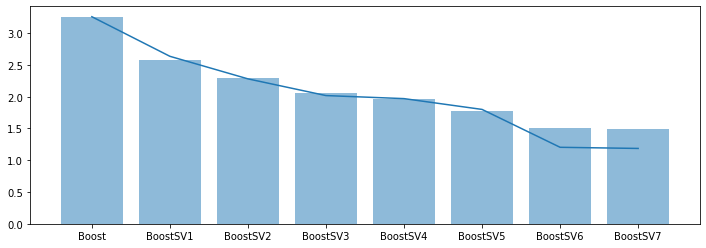

In [27]:
puntaje = [3.259,2.571,2.298,2.060,1.960,1.773,1.514,1.495]
puntaje_train = [3.259,2.636,2.281,2.018,1.97,1.8,1.204, 1.186]
modelo = ['Boost','BoostSV1','BoostSV2','BoostSV3','BoostSV4','BoostSV5','BoostSV6','BoostSV7']
plt.figure(figsize=(12,4))
plt.bar(modelo,puntaje, alpha = 0.5)
plt.plot(puntaje_train)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Boost selected features 7

In [2]:
X_train, y_train = ASHRAE_data_prep.train_boost7()

In [5]:
mod_boost7 = GradientBoostingRegressor(max_depth=12, n_estimators=5)

In [4]:
X_train.head()

,meter,site_id,square_feet,air_temperature,hour,week
0,0,0,7432,25.0,0,53
1,0,0,7432,24.4,1,53
2,0,0,7432,22.8,2,53
3,0,0,7432,21.1,3,53
4,0,0,7432,20.0,4,53


In [ ]:
mod_boost7.fit(X_train, y_train.values.ravel())

In [ ]:
y_train_pred = mod_boost7.predict(X_train)
y_train_pred = np.maximum(0,y_train_pred)
np.sqrt(mean_squared_log_error(y_train,y_train_pred))


<BarContainer object of 12 artists>

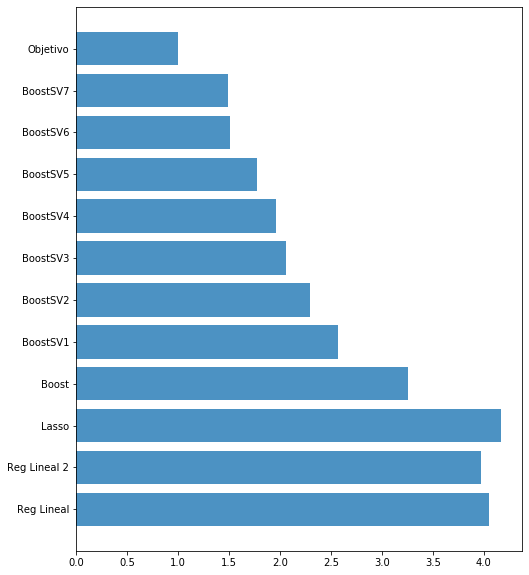

In [8]:
puntaje = [4.051, 3.972, 4.172, 3.259,2.571,2.298,2.060,1.960,1.773,1.514,1.495, 1]
modelo = ['Reg Lineal','Reg Lineal 2','Lasso','Boost','BoostSV1','BoostSV2','BoostSV3','BoostSV4','BoostSV5','BoostSV6','BoostSV7', 'Objetivo']
plt.figure(figsize=(8,10))
plt.barh(modelo,puntaje, alpha = 0.8)